In [2]:
import numpy as np
from numba import jit
from numpy.random import default_rng as rg
rng = rg(12345)
from tqdm import tqdm
import sys
sys.path.append('../core')
%matplotlib inline

In [3]:
import torch
torch.manual_seed(0)
import torch.optim as optim

In [4]:
from FLDojo import dojo
from FL import FL
from display2 import*

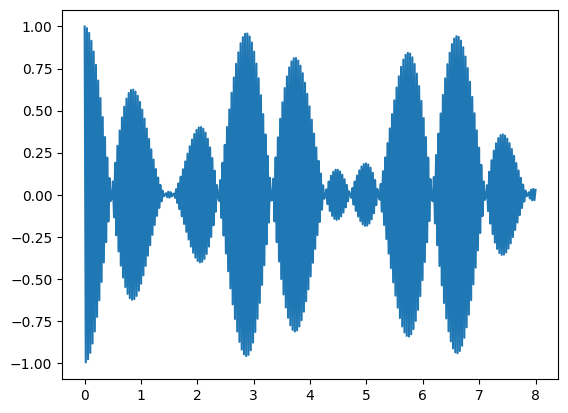

In [52]:
Xs = np.linspace(0,8,400)
Ys = np.cos(160*Xs)*np.cos(1*Xs)
from matplotlib import pyplot as plt
plt.plot(Xs,Ys)
# a three layer nn can represent any multivariate function (continuous or discontinuous) https://arxiv.org/abs/2012.03016


In [53]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]
X = torch.from_numpy(Xs).float().unsqueeze(1).to(device)
y = torch.from_numpy(Ys).float().unsqueeze(1).to(device)
split = 0.75
train_X = X[:int(split*len(X))]
train_y = y[:int(split*len(y))]
test_X = X[int(split*len(X)):]
test_y = y[int(split*len(y)):]

In [63]:
D = dojo()
D.epochs=1000
D.max_batch_size=train_X.shape[0]
opt = lambda x: optim.Adam(x, lr=0.00005) # Adam better than SGD and AdamW in quick tests.

100%|██████████| 1000/1000 [00:13<00:00, 75.74it/s]


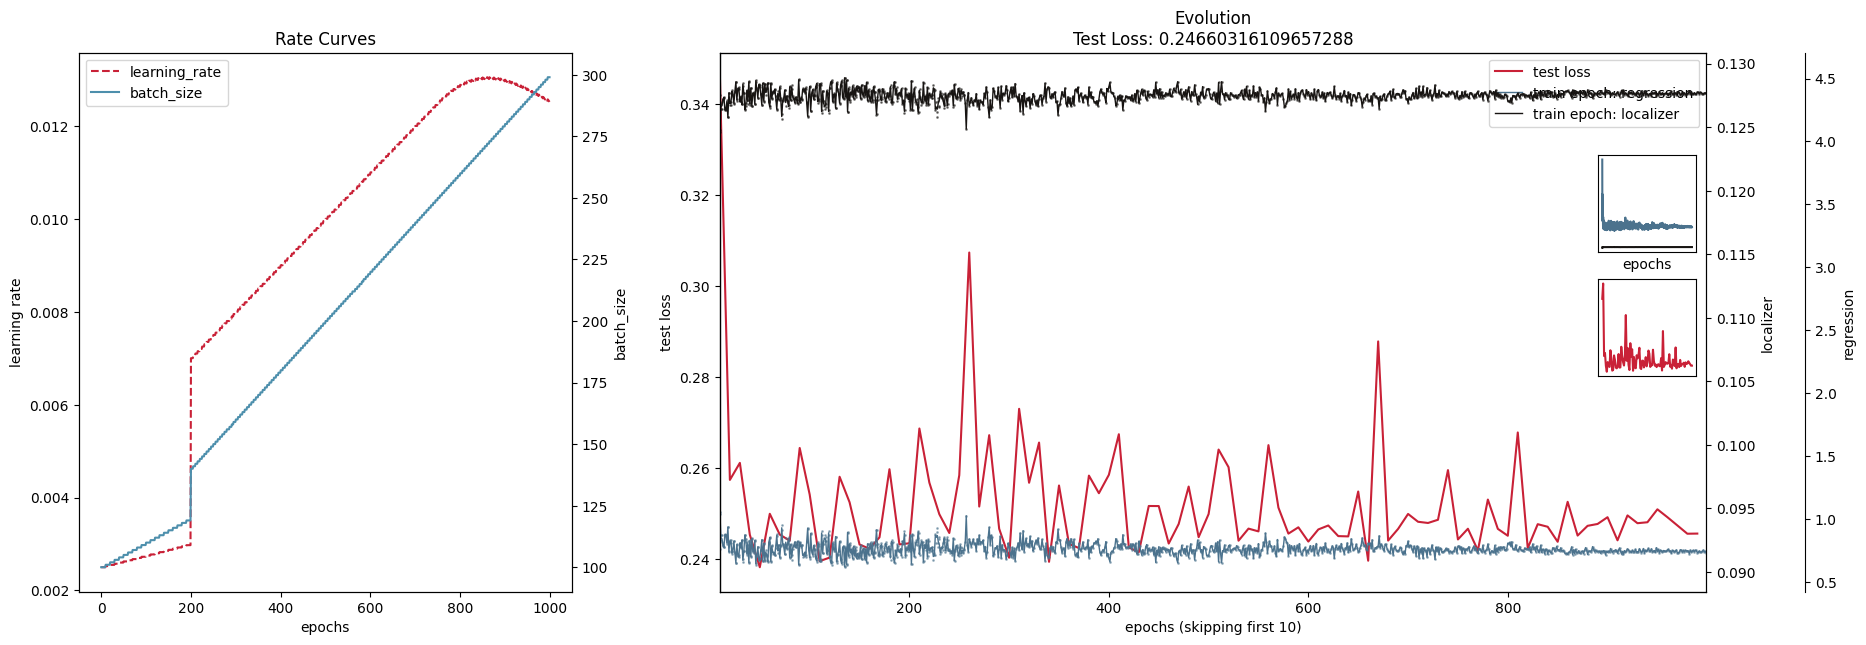

In [64]:
sizes = [1, 100, 100, 100] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.05
k = [0.9]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FL(device, sizes, delta, k, opttype=opt, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X,test_y, start_batch_size=100, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

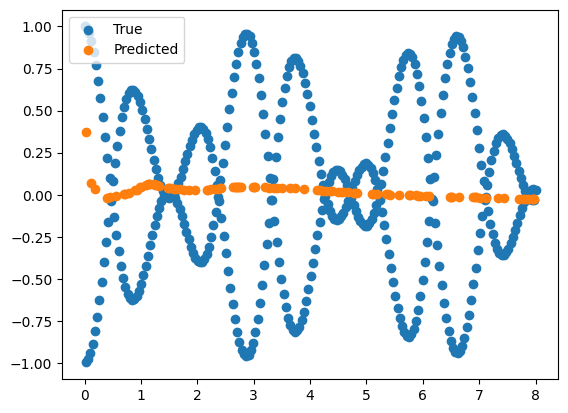

In [65]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

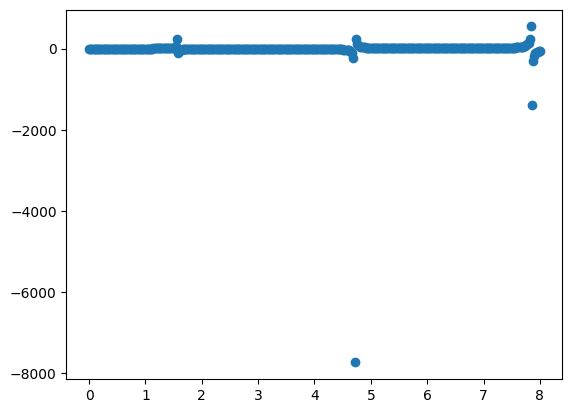

In [68]:
Xs = np.linspace(0,8,400)
Ys = Xs/np.cos(1*Xs)
from matplotlib import pyplot as plt
plt.scatter(Xs,Ys)
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]
X = torch.from_numpy(Xs).float().unsqueeze(1).to(device)
y = torch.from_numpy(Ys).float().unsqueeze(1).to(device)
split = 0.75
train_X = X[:int(split*len(X))]
train_y = y[:int(split*len(y))]
test_X = X[int(split*len(X)):]
test_y = y[int(split*len(y)):]

100%|██████████| 1000/1000 [00:14<00:00, 68.35it/s]


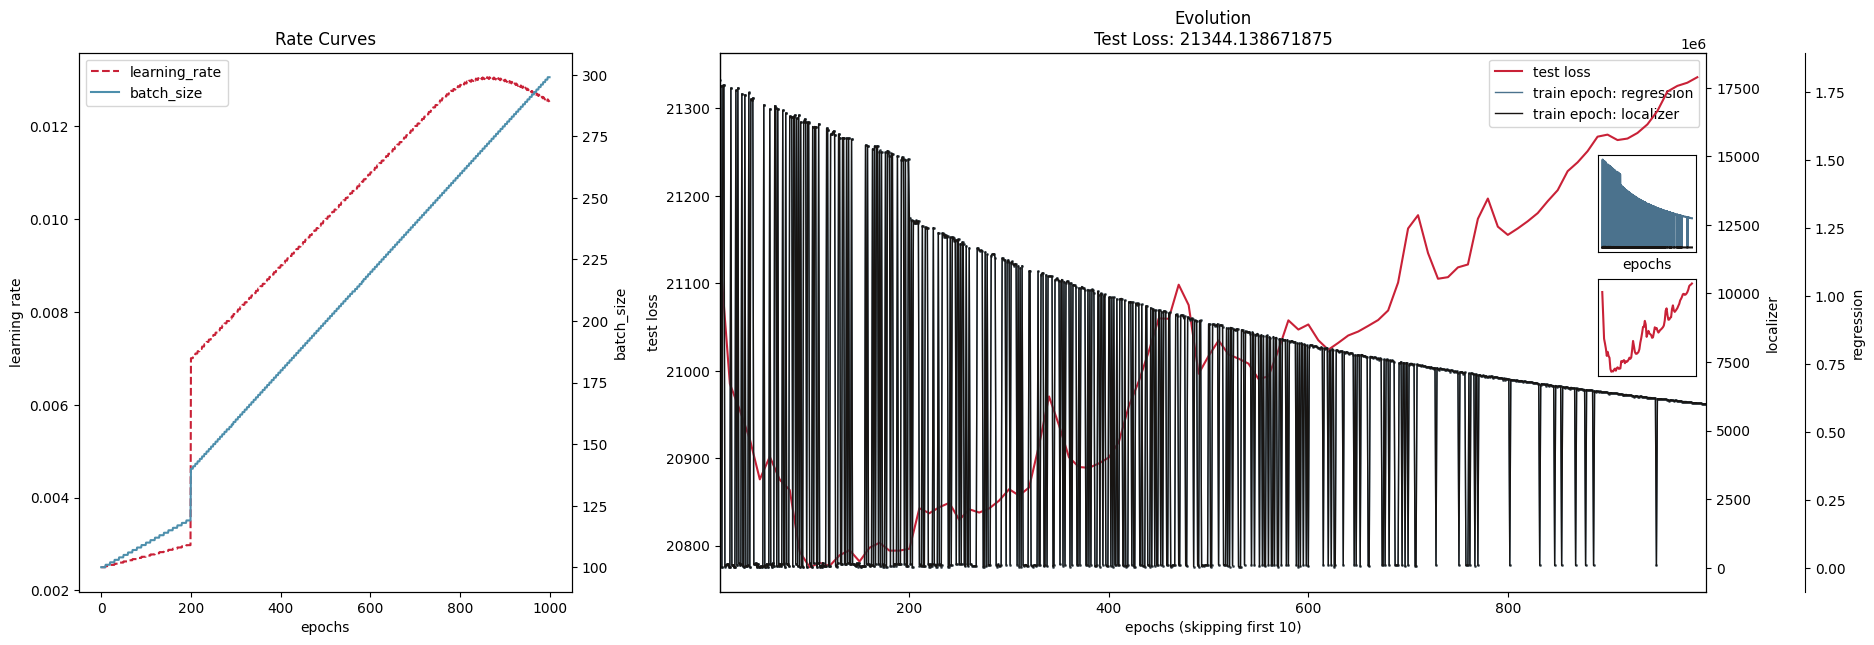

In [69]:
opt = lambda x: optim.Adam(x, lr=0.00005) # Adam better than SGD and AdamW in quick tests.
sizes = [1, 100, 100, 100] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.05
k = [0.9]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FL(device, sizes, delta, k, opttype=opt, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X,test_y, start_batch_size=100, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

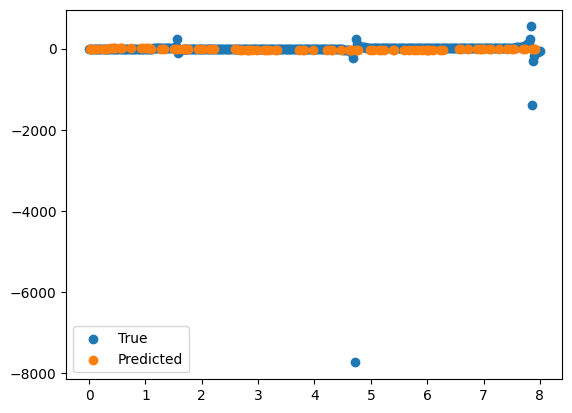

In [70]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:14<00:00, 68.87it/s]


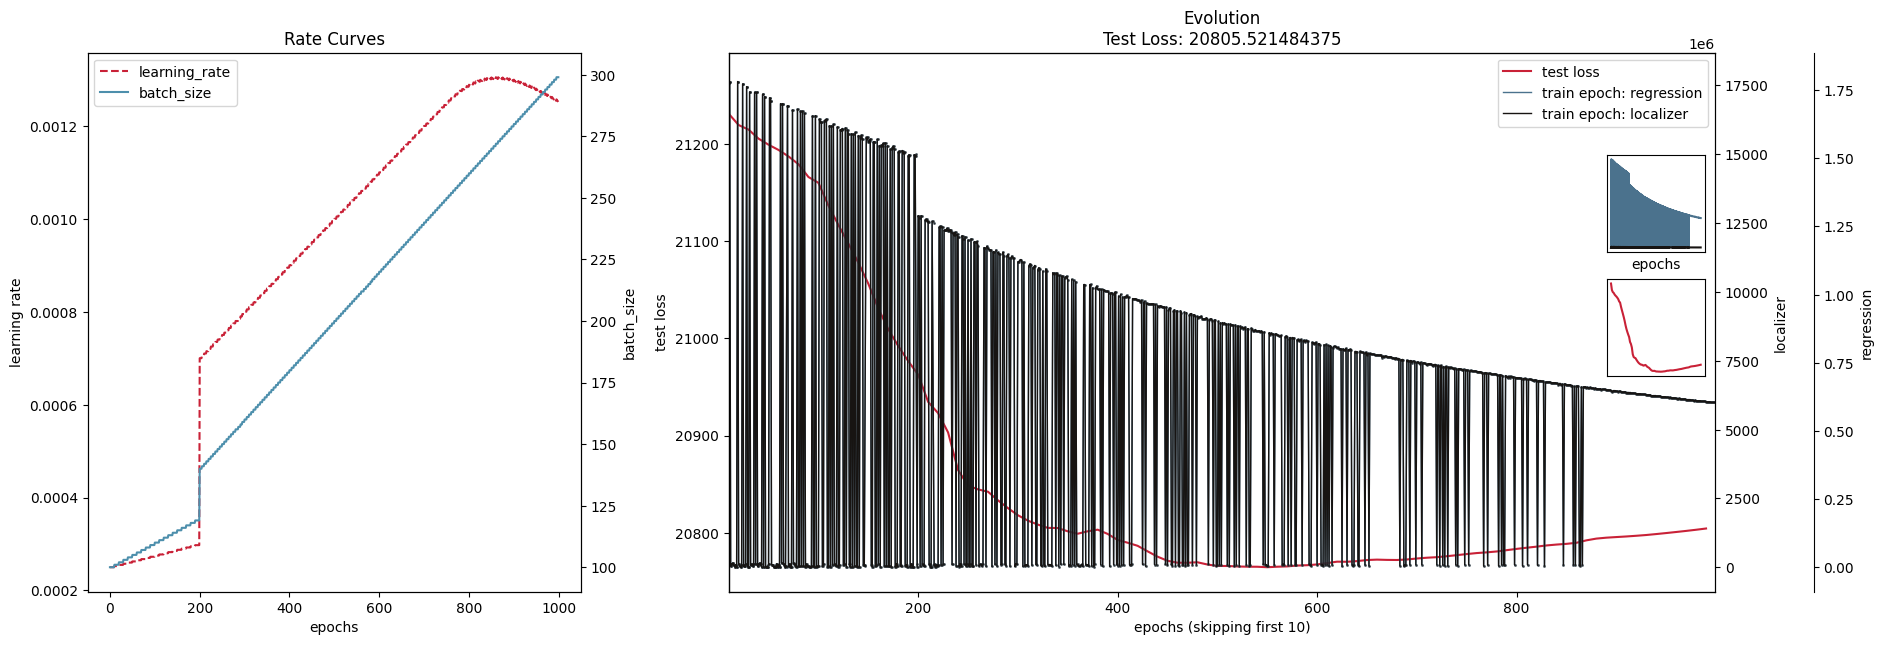

In [74]:
opt = lambda x: optim.Adam(x, lr=0.000005) # Adam better than SGD and AdamW in quick tests.
sizes = [1, 100, 100, 100] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.05
k = [0.9]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FL(device, sizes, delta, k, opttype=opt, bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X,test_y, start_batch_size=100, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

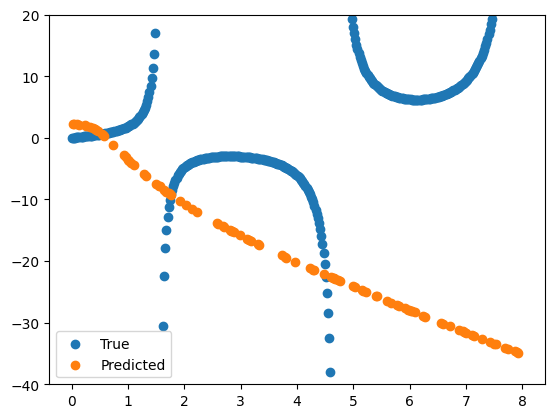

In [76]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.ylim(-40,20)
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:14<00:00, 68.59it/s]


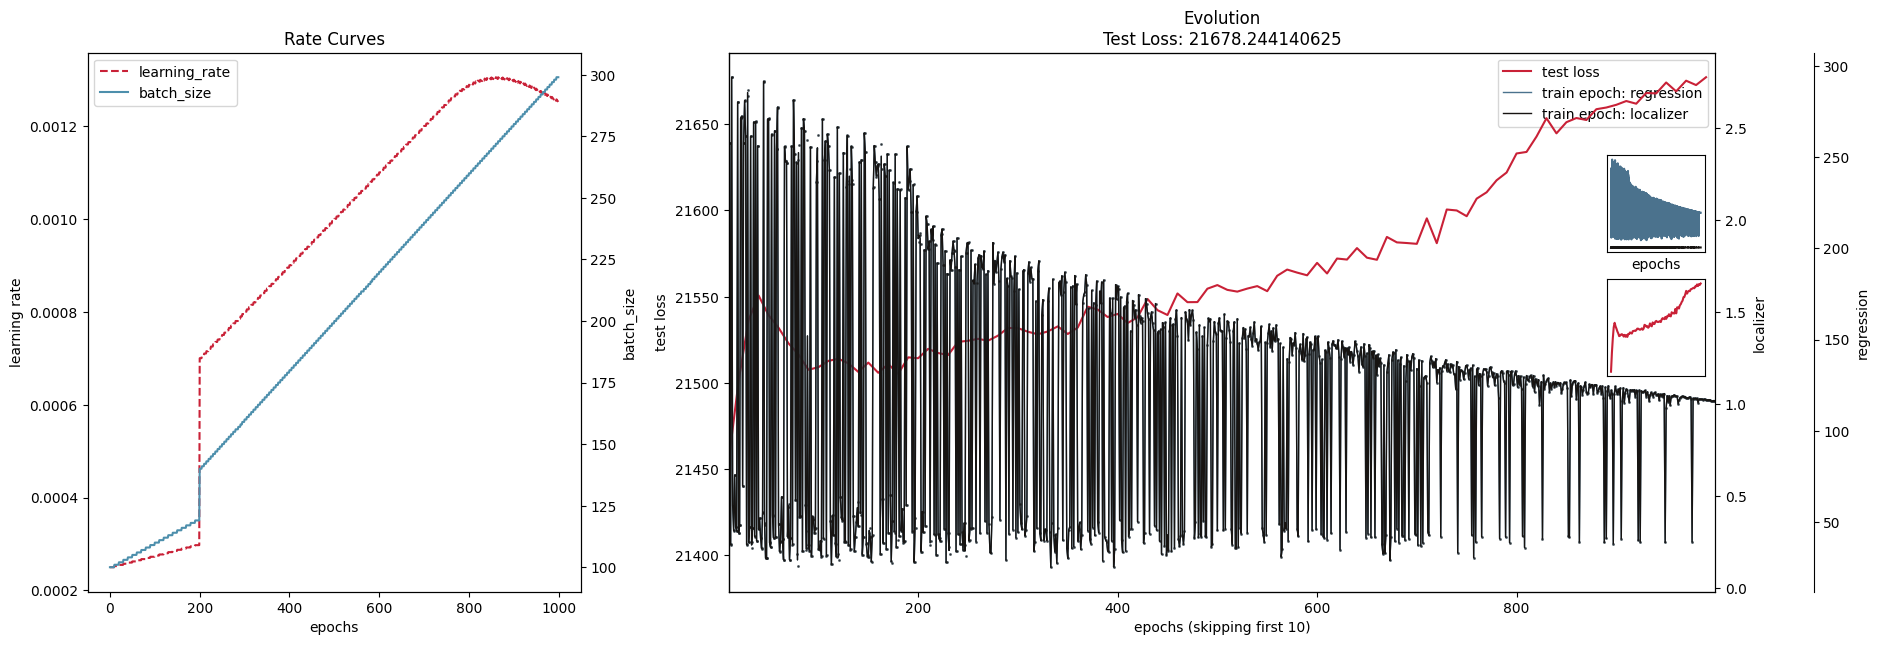

In [77]:
opt = lambda x: optim.Adam(x, lr=0.000005) # Adam better than SGD and AdamW in quick tests.
sizes = [1, 100, 100, 100] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.05
k = [0.9]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FL(device, sizes, delta, k, opttype=opt, crit=torch.nn.L1Loss(), bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X,test_y, start_batch_size=100, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

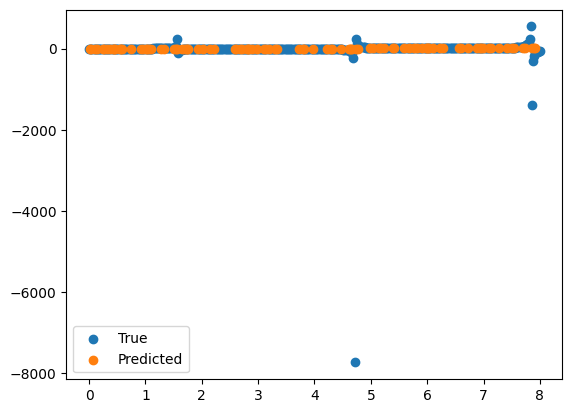

In [80]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
# plt.ylim(-40,20)
plt.legend()
plt.show()

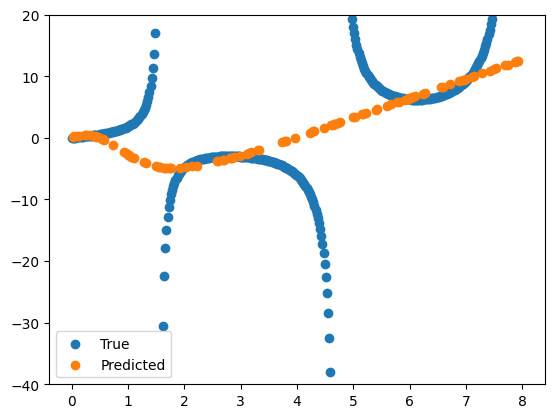

In [81]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.ylim(-40,20)
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:24<00:00, 40.25it/s]


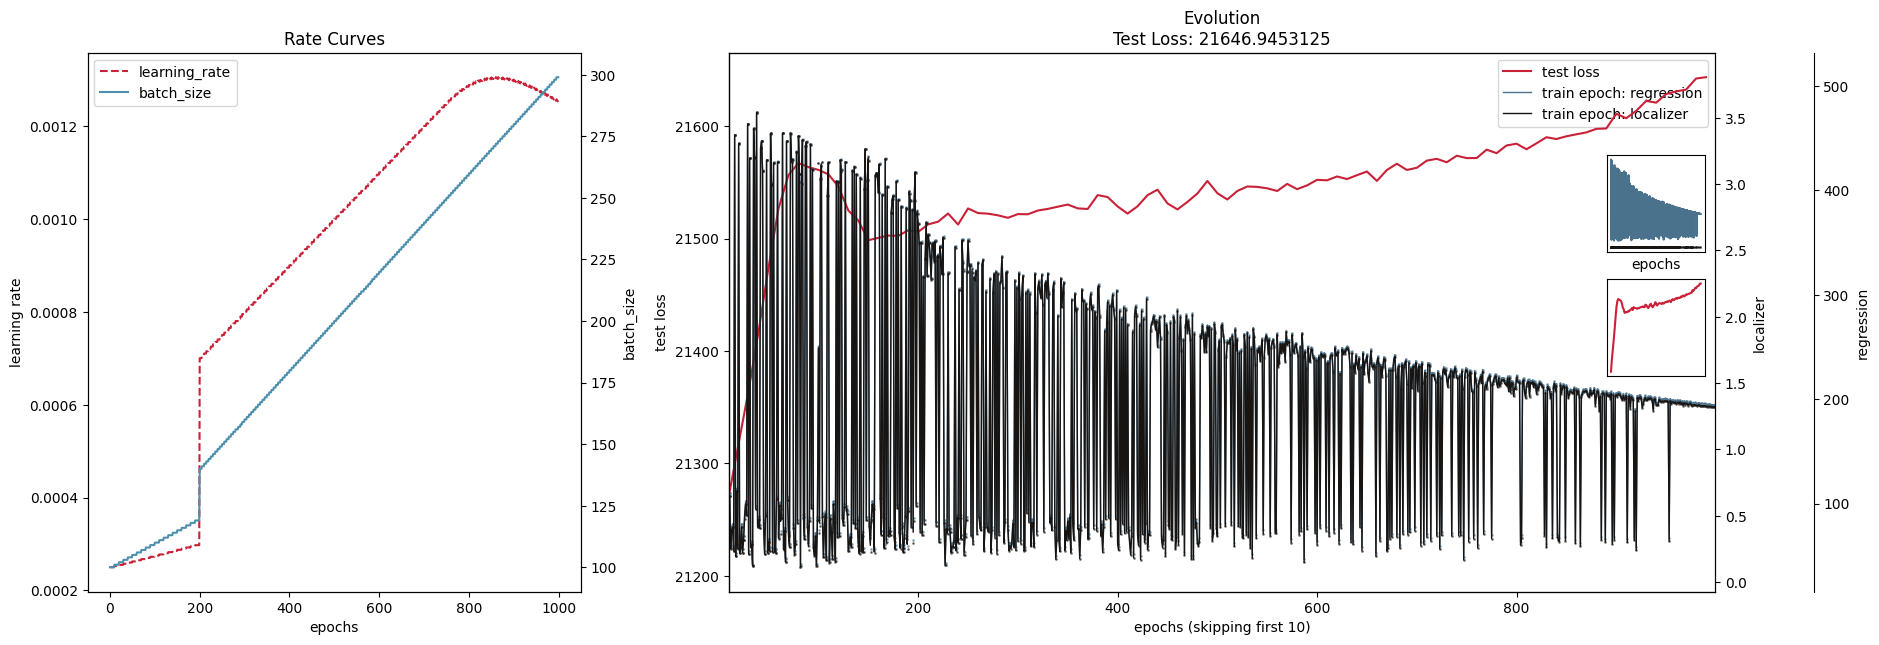

In [79]:
opt = lambda x: optim.Adam(x, lr=0.000005) # Adam better than SGD and AdamW in quick tests.
sizes = [1, 100, 200, 100, 200, 100] # larger the size, the better the approximation (shallow better than deep)
delta = np.array([1]*len(sizes))*0.05
k = [0.9]*len(sizes) # smaller k seems to help slightly, but not much.
# with torch.autograd.set_detect_anomaly(True):
net = FL(device, sizes, delta, k, opttype=opt, crit=torch.nn.L1Loss(), bias=True) # expect 1.6% error rate
report = D.train(net, train_X, train_y, test_X,test_y, start_batch_size=100, minibatch=0.5)
ecran(net, test_X, test_y, report, classification=False)

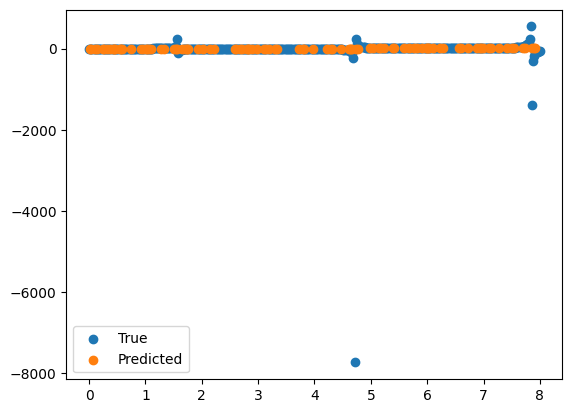

In [82]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
# plt.ylim(-40,20)
plt.legend()
plt.show()

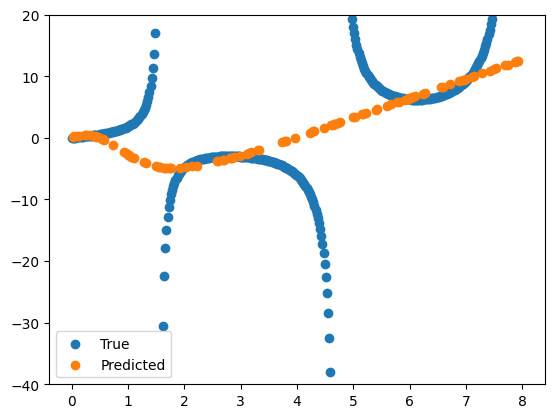

In [83]:
plt.scatter(Xs,Ys,label='True')
plt.scatter(test_X.detach().cpu().numpy(),net(test_X).detach().cpu().numpy(),label='Predicted')
plt.ylim(-40,20)
plt.legend()
plt.show()